In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load cleaned data
file_path = r"C:\Users\Vanitha\OneDrive\Documents\GUVI\capstone_project\app_user_behavior_segmentation\data\cleaned\cleaned_data.csv"
df_model = pd.read_csv(file_path)

df_model.shape

(50000, 38)

In [4]:
df_model.head() 

,age,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,...,app_version_1.1,app_version_1.2,app_version_2.0,app_version_2.1,subscription_type_Free,subscription_type_Premium,marketing_source_Facebook Ads,marketing_source_Google Ads,marketing_source_Organic,marketing_source_Referral
0,56,5,3.41,52.71,13,5,8,8,1,0,...,False,False,False,True,False,False,False,False,False,True
1,46,8,24.44,42.03,7,7,3,7,0,0,...,False,False,False,False,True,False,False,False,False,False
2,32,12,5.34,76.69,7,5,2,21,1,0,...,False,True,False,False,True,False,False,True,False,False
3,25,5,3.98,65.38,16,8,4,13,0,0,...,False,False,True,False,False,False,False,False,True,False
4,38,10,12.85,57.06,13,7,3,15,0,0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Load the scales data
file_path1 = r"C:\Users\Vanitha\OneDrive\Documents\GUVI\capstone_project\app_user_behavior_segmentation\data\cleaned\scaled_for_clustering.csv"
scaled_df = pd.read_csv(file_path1)

scaled_df.head() 

,age,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,...,app_version_1.1,app_version_1.2,app_version_2.0,app_version_2.1,subscription_type_Free,subscription_type_Premium,marketing_source_Facebook Ads,marketing_source_Google Ads,marketing_source_Organic,marketing_source_Referral
0,1.445821,-1.060179,-1.088633,0.386849,0.283336,0.001512,2.002730,-0.862410,0.950305,-0.442514,...,-0.499344,-0.501687,-0.497593,2.014363,-1.229247,-0.417346,-0.418864,-0.576365,-0.735058,2.373221
1,0.619022,0.000113,1.261914,-0.160705,-1.440677,0.896304,-0.500094,-1.020050,-0.627017,-0.442514,...,-0.499344,-0.501687,-0.497593,-0.496435,0.813506,-0.417346,-0.418864,-0.576365,-0.735058,-0.421368
2,-0.538498,1.413835,-0.872915,1.616282,-1.440677,0.001512,-1.000659,1.186909,0.950305,-0.442514,...,-0.499344,1.993275,-0.497593,-0.496435,0.813506,-0.417346,-0.418864,1.735012,-0.735058,-0.421368
3,-1.117258,-1.060179,-1.024924,1.036429,1.145342,1.343700,0.000471,-0.074211,-0.627017,-0.442514,...,-0.499344,-0.501687,2.009676,-0.496435,-1.229247,-0.417346,-0.418864,-0.576365,1.360437,-0.421368
4,-0.042418,0.706974,-0.033514,0.609870,0.283336,0.896304,-0.500094,0.241069,-0.627017,-0.442514,...,-0.499344,-0.501687,-0.497593,-0.496435,-1.229247,-0.417346,-0.418864,-0.576365,-0.735058,-0.421368


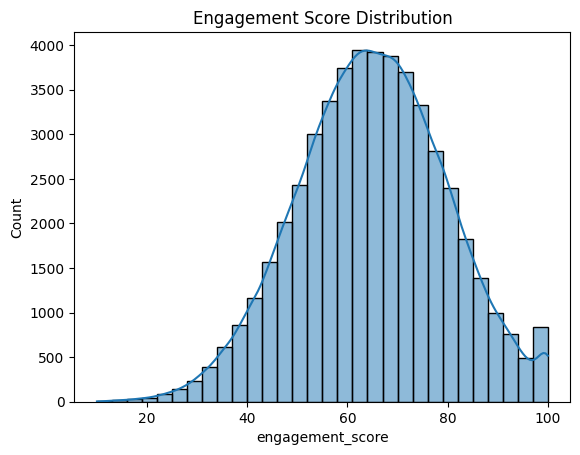

In [8]:
# Distribution of Engagement Score
sns.histplot(df_model['engagement_score'], bins=30, kde=True)
plt.title("Engagement Score Distribution")
plt.show() 

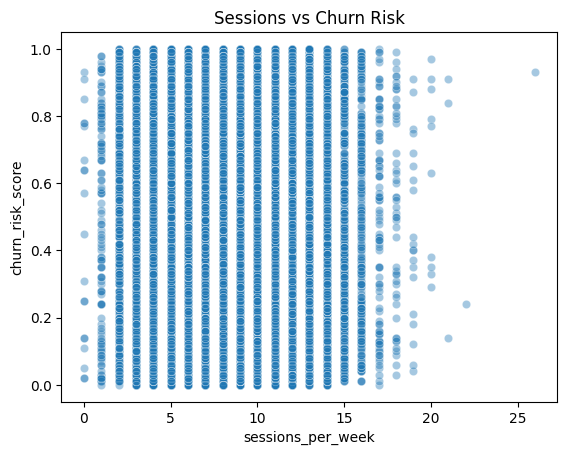

In [9]:
# Sessions Vs Churn Risks
sns.scatterplot(
    x='sessions_per_week',
    y='churn_risk_score',
    data=df_model,
    alpha=0.4
)
plt.title("Sessions vs Churn Risk")
plt.show() 

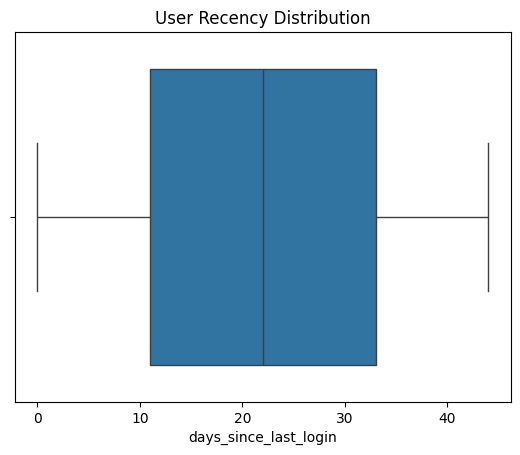

In [10]:
# Days Since Last Login Distribution
sns.boxplot(x=df_model['days_since_last_login'])
plt.title("User Recency Distribution")
plt.show() 

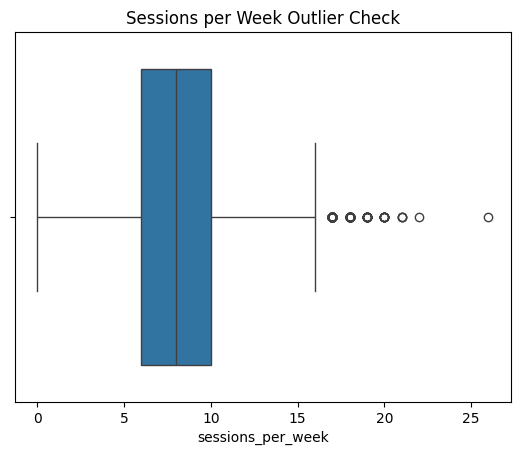

In [12]:
# Outliers check
sns.boxplot(x=df_model['sessions_per_week'])
plt.title("Sessions per Week Outlier Check")
plt.show()

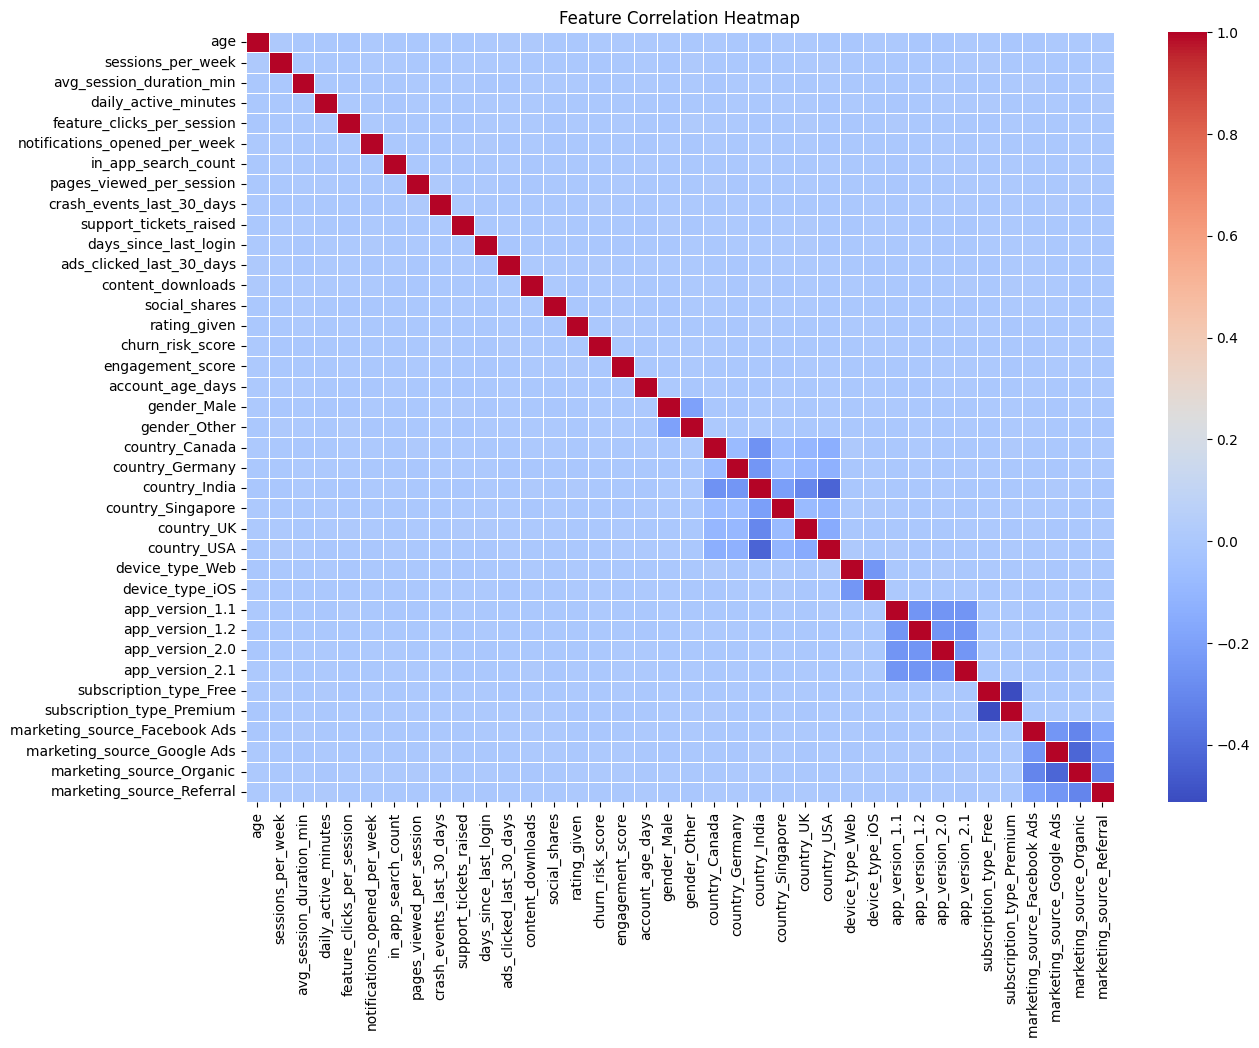

In [13]:
# Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(scaled_df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show() 